In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

sns.set_theme()

In [3]:
import os
os.chdir("/content/sample_data")
!ls
df = pd.read_csv('heart.csv')
df

anscombe.json		     california_housing_train.csv  mnist_test.csv	  README.md
california_housing_test.csv  heart.csv			   mnist_train_small.csv


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<Axes: xlabel='HeartDisease', ylabel='Count'>

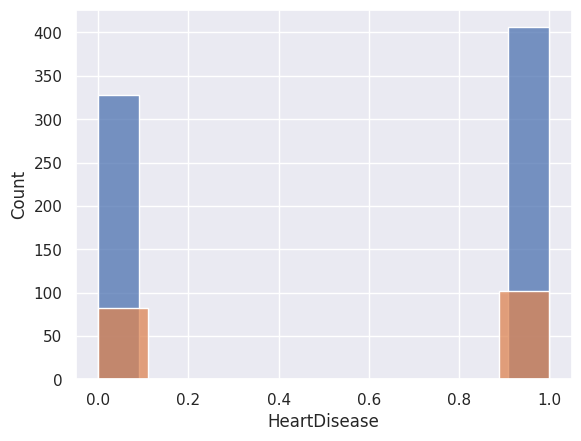

In [4]:
features = [x for x in df.columns if x != 'HeartDisease']
target_labels = ['HeartDisease']

spliter = StratifiedKFold()

folds = list(spliter.split(df[features], df[target_labels]))

fold_0 = folds[0]

train_idx, test_idx = fold_0

train_x = df[features].loc[train_idx]
train_y = df[target_labels].loc[train_idx]

test_x = df[features].loc[test_idx]
test_y = df[target_labels].loc[test_idx]

# test_y
sns.histplot(train_y, x='HeartDisease')
sns.histplot(test_y, x='HeartDisease')


In [5]:
kategorial = ['Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']
numbers = [x for x in features if x not in kategorial ]

label_coder = OneHotEncoder()
target_coder = OneHotEncoder()

label_coder.fit(df[kategorial])
target_coder.fit(df[target_labels])

train_x_kategorial = label_coder.transform(train_x[kategorial]).toarray()
test_x_kategorial = label_coder.transform(test_x[kategorial]).toarray()

train_Y = target_coder.transform(train_y[target_labels])
test_Y = target_coder.transform(test_y[target_labels])
df[numbers]

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


In [6]:
minmaxX = MinMaxScaler()
minmaxY = MinMaxScaler()

minmaxX.fit(df[numbers])
# minmaxY.fit(df[target_labels])

train_x_numbers = minmaxX.transform(train_x[numbers])
test_x_numbers = minmaxX.transform(test_x[numbers])

# train_Y = minmaxY.transform(train_y)
# test_Y = minmaxY.transform(test_y)


train_X = np.concatenate((train_x_kategorial, train_x_numbers), axis = 1)
test_X = np.concatenate((test_x_kategorial, test_x_numbers), axis = 1)

df2 = pd.DataFrame(train_X)
df2
train_Y

<734x2 sparse matrix of type '<class 'numpy.float64'>'
	with 734 stored elements in Compressed Sparse Row format>

In [7]:
train_X.shape ,train_Y.shape, test_X.shape, test_Y.shape

((734, 21), (734, 2), (184, 21), (184, 2))

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5173 - loss: 0.9392 - val_accuracy: 0.8696 - val_loss: 0.8553
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7958 - loss: 0.8572 - val_accuracy: 0.8913 - val_loss: 0.7564
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8042 - loss: 0.7695 - val_accuracy: 0.9022 - val_loss: 0.6198
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8280 - loss: 0.6684 - val_accuracy: 0.9076 - val_loss: 0.4920
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8477 - loss: 0.5800 - val_accuracy: 0.9022 - val_loss: 0.4415
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8505 - loss: 0.5521 - val_accuracy: 0.9076 - val_loss: 0.4234
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8608 - loss: 0.5455 - val_accuracy: 0.9022 - val_loss: 0.4308
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8497 - loss: 0.5300 - val_accuracy: 0.8913 - val_loss

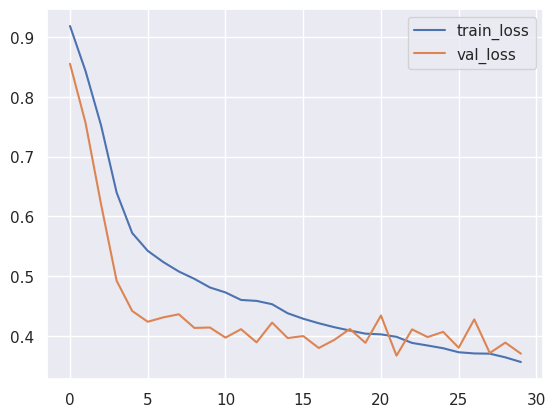

Max val acc 0.907608687877655


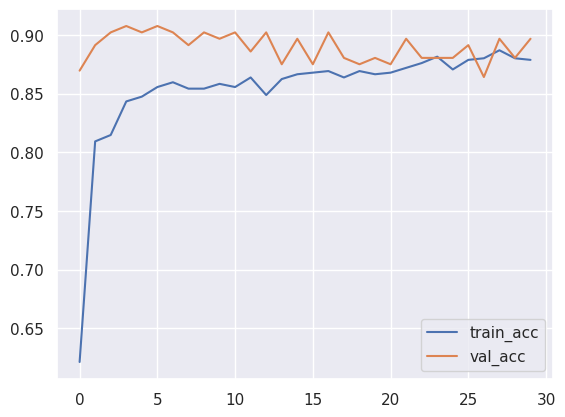

In [13]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(21,),activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
h = model.fit(train_X, train_Y.toarray(), validation_data=(test_X, test_Y.toarray()), batch_size = 64, epochs=30)


plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.legend()
plt.plot(h.history['accuracy'], label = 'train_acc')
plt.plot(h.history['val_accuracy'], label = 'val_acc')
plt.legend()
print('Max val acc', np.max(h.history['val_accuracy']))
